In [2]:
os.path.abspath(".")

NameError: name 'os' is not defined

In [ ]:
import pandas as pd
import numpy as np
import os

In [3]:
import pandas as pd
data = pd.read_csv('data/cb_mageck.gene_summary.tsv')

In [4]:
data

,id\tnum\tneg|score\tneg|p-value\tneg|fdr\tneg|rank\tneg|goodsgrna\tneg|lfc\tpos|score\tpos|p-value\tpos|fdr\tpos|rank\tpos|goodsgrna\tpos|lfc
0,UPF2\t4\t1.0\t1.0\t0.999998\t2190\t0\t2.784\t4...
1,RPL12\t4\t1.0\t1.0\t0.999998\t2189\t0\t2.9256\...
2,EIF2S3\t4\t0.5951\t0.66922\t0.999998\t1337\t1\...
3,RPL8\t4\t0.99999\t1.0\t0.999998\t2188\t0\t1.65...
4,PHB\t4\t0.99002\t0.99012\t0.999998\t2117\t0\t3...
...,...
2185,HNRNPC\t4\t0.00020848\t0.00084317\t0.210171\t7...
2186,METTL3\t4\t0.00014486\t0.00056739\t0.207096\t6...
2187,SBDS\t4\t3.6961e-05\t0.00013337\t0.058416\t5\t...
2188,PPP1R10\t4\t3.0989e-05\t0.00011076\t0.058416\t...


In [5]:
import pandas as pd
import numpy as np
data = pd.read_table('data/cb_mageck.gene_summary.tsv')


In [6]:
data

,id,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc
0,UPF2,4,1.000000,1.000000,0.999998,2190,0,2.7840,4.123600e-08,0.000002,0.001650,1,4,2.7840
1,RPL12,4,1.000000,1.000000,0.999998,2189,0,2.9256,1.476300e-07,0.000002,0.001650,2,4,2.9256
2,EIF2S3,4,0.595100,0.669220,0.999998,1337,1,3.7772,3.438300e-07,0.000002,0.001650,3,3,3.7772
3,RPL8,4,0.999990,1.000000,0.999998,2188,0,1.6520,5.870100e-06,0.000034,0.012023,4,4,1.6520
4,PHB,4,0.990020,0.990120,0.999998,2117,0,3.0105,6.247800e-06,0.000034,0.012023,5,4,3.0105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,HNRNPC,4,0.000208,0.000843,0.210171,7,4,-1.2900,9.997900e-01,0.999810,0.999989,2186,0,-1.2900
2186,METTL3,4,0.000145,0.000567,0.207096,6,4,-1.2784,9.998600e-01,0.999860,0.999989,2187,0,-1.2784
2187,SBDS,4,0.000037,0.000133,0.058416,5,4,-2.3797,9.999600e-01,0.999960,0.999989,2188,0,-2.3797
2188,PPP1R10,4,0.000031,0.000111,0.058416,4,4,-2.1098,9.999700e-01,0.999970,0.999989,2189,0,-2.1098


In [7]:
import pandas as pd
import numpy as np
import os

In [8]:
import pandas as pd
data = pd.read_csv('data/cb_go_output.csv')

In [9]:
data

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes
0,GO:0000184,"nuclear-transcribed mRNA catabolic process, no...",2.850000e-28,2.090000e-24,"4.48 (2150,115,263,63)",[+] Show genes
1,GO:0019083,viral transcription,2.100000e-27,7.720000e-24,"5.02 (2150,88,263,54)",[+] Show genes
2,GO:0006613,cotranslational protein targeting to membrane,2.650000e-27,6.500000e-24,"4.63 (2150,90,294,57)",[+] Show genes
3,GO:0006413,translational initiation,2.990000e-27,5.500000e-24,"4.12 (2150,133,263,67)",[+] Show genes
4,GO:0006614,SRP-dependent cotranslational protein targetin...,5.960000e-27,8.760000e-24,"4.65 (2150,88,294,56)",[+] Show genes
...,...,...,...,...,...,...
122,GO:0048701,embryonic cranial skeleton morphogenesis,5.930000e-04,3.550000e-02,"14.53 (2150,3,148,3)",[+] Show genes
123,GO:0098662,inorganic cation transmembrane transport,6.650000e-04,3.940000e-02,"7.04 (2150,13,141,6)",[+] Show genes
124,GO:0031100,animal organ regeneration,7.080000e-04,4.170000e-02,"107.50 (2150,8,5,2)",[+] Show genes
125,GO:0000463,maturation of LSU-rRNA from tricistronic rRNA ...,8.370000e-04,4.880000e-02,"6.41 (2150,11,183,6)",[+] Show genes


In [17]:
import pandas as pd
filtered_data = data[data['FDR q-value'] < 0.05]


KeyError: 'fdr q-value'

In [18]:
import pandas as pd
import numpy as np
import os

In [19]:
import pandas as pd
filtered_data = data[data['FDR q-value'] < 0.05]

KeyError: 'FDR q-value'

In [22]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('data/cb_go_output.csv')

# Filter the DataFrame
filtered_data = data[data['FDR q-value'] < 0.05]


In [21]:
data

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes
0,GO:0000184,"nuclear-transcribed mRNA catabolic process, no...",2.850000e-28,2.090000e-24,"4.48 (2150,115,263,63)",[+] Show genes
1,GO:0019083,viral transcription,2.100000e-27,7.720000e-24,"5.02 (2150,88,263,54)",[+] Show genes
2,GO:0006613,cotranslational protein targeting to membrane,2.650000e-27,6.500000e-24,"4.63 (2150,90,294,57)",[+] Show genes
3,GO:0006413,translational initiation,2.990000e-27,5.500000e-24,"4.12 (2150,133,263,67)",[+] Show genes
4,GO:0006614,SRP-dependent cotranslational protein targetin...,5.960000e-27,8.760000e-24,"4.65 (2150,88,294,56)",[+] Show genes
...,...,...,...,...,...,...
122,GO:0048701,embryonic cranial skeleton morphogenesis,5.930000e-04,3.550000e-02,"14.53 (2150,3,148,3)",[+] Show genes
123,GO:0098662,inorganic cation transmembrane transport,6.650000e-04,3.940000e-02,"7.04 (2150,13,141,6)",[+] Show genes
124,GO:0031100,animal organ regeneration,7.080000e-04,4.170000e-02,"107.50 (2150,8,5,2)",[+] Show genes
125,GO:0000463,maturation of LSU-rRNA from tricistronic rRNA ...,8.370000e-04,4.880000e-02,"6.41 (2150,11,183,6)",[+] Show genes


In [23]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('data/cb_go_output.csv')

# Filter the DataFrame
filtered_data = data[data['FDR q-value'] < 0.05]

In [27]:
import pandas as pd

df = pd.read_csv('cb_go_output.csv')

delimiter = ',''()'

df['enrichment'] = df['Enrichment (N, B, n, b)'].str.split(' ', expand=True)[0]

df['Enrichment'] = split_numbers [0]
df['Calculation1'] = split_numbers [1]
df['Calculation2'] = split_numbers [2]
df['Calculation3'] = split_numbers [3]
df['Calculation4'] = split_numbers [4]

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'cb_go_output.csv'

In [28]:
import pandas as pd

df = pd.read_csv('cb_go_output.csv')

df['enrichment'] = df['Enrichment (N, B, n, b)'].str.split(',', expand=True)[0]

split_numbers = df['Enrichment (N, B, n, b)'].str.extract(r'\((.*?)\)').fillna('').apply(lambda x: x.str.split(','))

df['Enrichment'] = split_numbers[0].str[0]
df['Calculation1'] = split_numbers[0].str[1]
df['Calculation2'] = split_numbers[0].str[2]
df['Calculation3'] = split_numbers[0].str[3]
df['Calculation4'] = split_numbers[0].str[4]

df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'cb_go_output.csv'

In [29]:
import pandas as pd

df = pd.read_csv('data/cb_go_output.csv')

df['enrichment'] = df['Enrichment (N, B, n, b)'].str.split(' ', expand=True)[0]

split_numbers = df['Enrichment (N, B, n, b)'].str.extract(r'\((.*?)\)').fillna('').apply(lambda x: x.str.split(','))

df['Enrichment'] = split_numbers[0].str[0]
df['Calculation1'] = split_numbers[0].str[1]
df['Calculation2'] = split_numbers[0].str[2]
df['Calculation3'] = split_numbers[0].str[3]
df['Calculation4'] = split_numbers[0].str[4]

df.head()


,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes,enrichment,Enrichment,Calculation1,Calculation2,Calculation3,Calculation4
0,GO:0000184,"nuclear-transcribed mRNA catabolic process, no...",2.850000e-28,2.090000e-24,"4.48 (2150,115,263,63)",[+] Show genes,4.48,2150,115,263,63,NaN
1,GO:0019083,viral transcription,2.100000e-27,7.720000e-24,"5.02 (2150,88,263,54)",[+] Show genes,5.02,2150,88,263,54,NaN
2,GO:0006613,cotranslational protein targeting to membrane,2.650000e-27,6.500000e-24,"4.63 (2150,90,294,57)",[+] Show genes,4.63,2150,90,294,57,NaN
3,GO:0006413,translational initiation,2.990000e-27,5.500000e-24,"4.12 (2150,133,263,67)",[+] Show genes,4.12,2150,133,263,67,NaN
4,GO:0006614,SRP-dependent cotranslational protein targetin...,5.960000e-27,8.760000e-24,"4.65 (2150,88,294,56)",[+] Show genes,4.65,2150,88,294,56,NaN


In [34]:
import pandas as pd 

df['enrichment'] = pd.to_numeric(df['enrichment'], errors='coerce')

filtered_df = df[df['FDR q-value'] < 0.05]
print(filtered_df)

filtered_df = df[df['enrichment'] > 2]
print(filtered_df)

df.head()

        GO term                                        Description  \
0    GO:0000184  nuclear-transcribed mRNA catabolic process, no...   
1    GO:0019083                                viral transcription   
2    GO:0006613      cotranslational protein targeting to membrane   
3    GO:0006413                           translational initiation   
4    GO:0006614  SRP-dependent cotranslational protein targetin...   
..          ...                                                ...   
122  GO:0048701           embryonic cranial skeleton morphogenesis   
123  GO:0098662           inorganic cation transmembrane transport   
124  GO:0031100                          animal organ regeneration   
125  GO:0000463  maturation of LSU-rRNA from tricistronic rRNA ...   
126  GO:0002429  immune response-activating cell surface recept...   

          P-value   FDR q-value Enrichment (N, B, n, b)           Genes  \
0    2.850000e-28  2.090000e-24  4.48 (2150,115,263,63)  [+] Show genes   
1    2.10

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes,enrichment,Enrichment,Calculation1,Calculation2,Calculation3,Calculation4
0,GO:0000184,"nuclear-transcribed mRNA catabolic process, no...",2.850000e-28,2.090000e-24,"4.48 (2150,115,263,63)",[+] Show genes,4.48,2150,115,263,63,NaN
1,GO:0019083,viral transcription,2.100000e-27,7.720000e-24,"5.02 (2150,88,263,54)",[+] Show genes,5.02,2150,88,263,54,NaN
2,GO:0006613,cotranslational protein targeting to membrane,2.650000e-27,6.500000e-24,"4.63 (2150,90,294,57)",[+] Show genes,4.63,2150,90,294,57,NaN
3,GO:0006413,translational initiation,2.990000e-27,5.500000e-24,"4.12 (2150,133,263,67)",[+] Show genes,4.12,2150,133,263,67,NaN
4,GO:0006614,SRP-dependent cotranslational protein targetin...,5.960000e-27,8.760000e-24,"4.65 (2150,88,294,56)",[+] Show genes,4.65,2150,88,294,56,NaN


In [35]:
df['enrichment'] = df.enrichment.astype(float)

In [36]:
df.enrichment.dtype

dtype('float64')

In [37]:
decimal_places = 0
df['enrichment'] = df['enrichment'].round(decimal_places)
df.head()

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes,enrichment,Enrichment,Calculation1,Calculation2,Calculation3,Calculation4
0,GO:0000184,"nuclear-transcribed mRNA catabolic process, no...",2.850000e-28,2.090000e-24,"4.48 (2150,115,263,63)",[+] Show genes,4.0,2150,115,263,63,NaN
1,GO:0019083,viral transcription,2.100000e-27,7.720000e-24,"5.02 (2150,88,263,54)",[+] Show genes,5.0,2150,88,263,54,NaN
2,GO:0006613,cotranslational protein targeting to membrane,2.650000e-27,6.500000e-24,"4.63 (2150,90,294,57)",[+] Show genes,5.0,2150,90,294,57,NaN
3,GO:0006413,translational initiation,2.990000e-27,5.500000e-24,"4.12 (2150,133,263,67)",[+] Show genes,4.0,2150,133,263,67,NaN
4,GO:0006614,SRP-dependent cotranslational protein targetin...,5.960000e-27,8.760000e-24,"4.65 (2150,88,294,56)",[+] Show genes,5.0,2150,88,294,56,NaN


In [38]:
filtered_df= df[df['FDR q-value'] < 0.05]
filtered_df.head()

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes,enrichment,Enrichment,Calculation1,Calculation2,Calculation3,Calculation4
0,GO:0000184,"nuclear-transcribed mRNA catabolic process, no...",2.850000e-28,2.090000e-24,"4.48 (2150,115,263,63)",[+] Show genes,4.0,2150,115,263,63,NaN
1,GO:0019083,viral transcription,2.100000e-27,7.720000e-24,"5.02 (2150,88,263,54)",[+] Show genes,5.0,2150,88,263,54,NaN
2,GO:0006613,cotranslational protein targeting to membrane,2.650000e-27,6.500000e-24,"4.63 (2150,90,294,57)",[+] Show genes,5.0,2150,90,294,57,NaN
3,GO:0006413,translational initiation,2.990000e-27,5.500000e-24,"4.12 (2150,133,263,67)",[+] Show genes,4.0,2150,133,263,67,NaN
4,GO:0006614,SRP-dependent cotranslational protein targetin...,5.960000e-27,8.760000e-24,"4.65 (2150,88,294,56)",[+] Show genes,5.0,2150,88,294,56,NaN


In [39]:
filtered_df.enrichment.dtype

dtype('float64')

In [40]:
filtered_df_2 = filtered_df[filtered_df['enrichment'] >2]
filtered_df_2.head()

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes,enrichment,Enrichment,Calculation1,Calculation2,Calculation3,Calculation4
0,GO:0000184,"nuclear-transcribed mRNA catabolic process, no...",2.850000e-28,2.090000e-24,"4.48 (2150,115,263,63)",[+] Show genes,4.0,2150,115,263,63,NaN
1,GO:0019083,viral transcription,2.100000e-27,7.720000e-24,"5.02 (2150,88,263,54)",[+] Show genes,5.0,2150,88,263,54,NaN
2,GO:0006613,cotranslational protein targeting to membrane,2.650000e-27,6.500000e-24,"4.63 (2150,90,294,57)",[+] Show genes,5.0,2150,90,294,57,NaN
3,GO:0006413,translational initiation,2.990000e-27,5.500000e-24,"4.12 (2150,133,263,67)",[+] Show genes,4.0,2150,133,263,67,NaN
4,GO:0006614,SRP-dependent cotranslational protein targetin...,5.960000e-27,8.760000e-24,"4.65 (2150,88,294,56)",[+] Show genes,5.0,2150,88,294,56,NaN


In [41]:
len(df)

127

In [42]:
len(filtered_df)

127

In [ ]:
len(filtered_df_2)

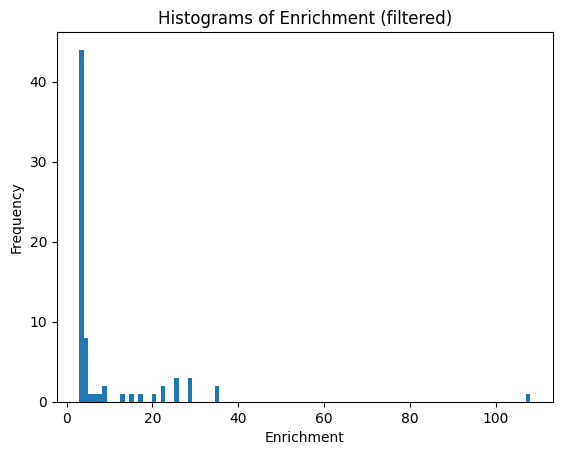

In [44]:
import matplotlib.pyplot as plt

plt.hist(filtered_df_2['enrichment'], bins=100)

plt.title('Histograms of Enrichment (filtered)')
plt.xlabel('Enrichment')
plt.ylabel('Frequency')

plt.show()